In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
pwd

'D:\\Code\\Projects\\Data Science projects\\Facebook data analysis'

In [61]:
dataset = pd.read_json('file:///D:/Code/Projects/Data Science projects/Facebook data analysis/Data/facebook-tamjidhs/posts/your_posts_1.json')
dataset.head()

,timestamp,attachments,data,title,tags
0,2015-10-11 13:47:23,[{'data': [{'media': {'uri': 'photos_and_video...,[],NaN,NaN
1,2015-10-25 16:17:23,[{'data': [{'media': {'uri': 'photos_and_video...,[],NaN,NaN
2,2015-12-16 14:37:21,[],[{'update_timestamp': 1450276641}],NaN,NaN
3,2015-12-16 14:37:30,[],[{'update_timestamp': 1450276650}],NaN,NaN
4,2015-12-16 14:37:37,[],[{'update_timestamp': 1450276657}],NaN,NaN


In [62]:
dataset.columns

Index(['timestamp', 'attachments', 'data', 'title', 'tags'], dtype='object')

In [63]:
dataset.dtypes

timestamp      datetime64[ns]
attachments            object
data                   object
title                  object
tags                   object
dtype: object

In [64]:
# rename the timestamp column
dataset.rename(columns={'timestamp': 'date'}, inplace=True)

# drop some unnecessary columns
dataset = dataset.drop(['attachments', 'title', 'tags'], axis=1)

# ensure it's datetime format
pd.to_datetime(dataset['date'])

dataset.head(3)

,date,data
0,2015-10-11 13:47:23,[]
1,2015-10-25 16:17:23,[]
2,2015-12-16 14:37:21,[{'update_timestamp': 1450276641}]


In [65]:
dataset.dtypes

date    datetime64[ns]
data            object
dtype: object

In [66]:
dataset.shape

(300, 2)

In [67]:
dataset.tail(3)                             #to check if dataset contains data till today

,date,data
297,2021-06-18 06:26:41,[{'update_timestamp': 1623997601}]
298,2021-06-29 19:20:57,"[{'post': 'If this isn't me....'}, {'update_ti..."
299,2021-08-05 19:31:54,"[{'post': 'ð'}, {'update_timestamp': 162819..."


In [68]:
dataset = dataset.set_index('date')
#.resample() with 'MS' (for "Month Start") to resample our data by month
#.size() to specify total #posts each month — the number of rows (i.e., posts) with a post date that fall within that month
post_counts = dataset['data'].resample('MS').size()             
post_counts

date
2015-10-01    2
2015-11-01    0
2015-12-01    6
2016-01-01    5
2016-02-01    5
             ..
2021-04-01    0
2021-05-01    1
2021-06-01    3
2021-07-01    0
2021-08-01    1
Freq: MS, Name: data, Length: 71, dtype: int64

Months with no posts have been correctly counted as 0 rather than simply skipped. That's one of the reasons why using resample(), which is designed to work with time series, is better for this kind of task than using something like groupby(), where it's easy to skip months with no data.

C:\Users\tamzi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


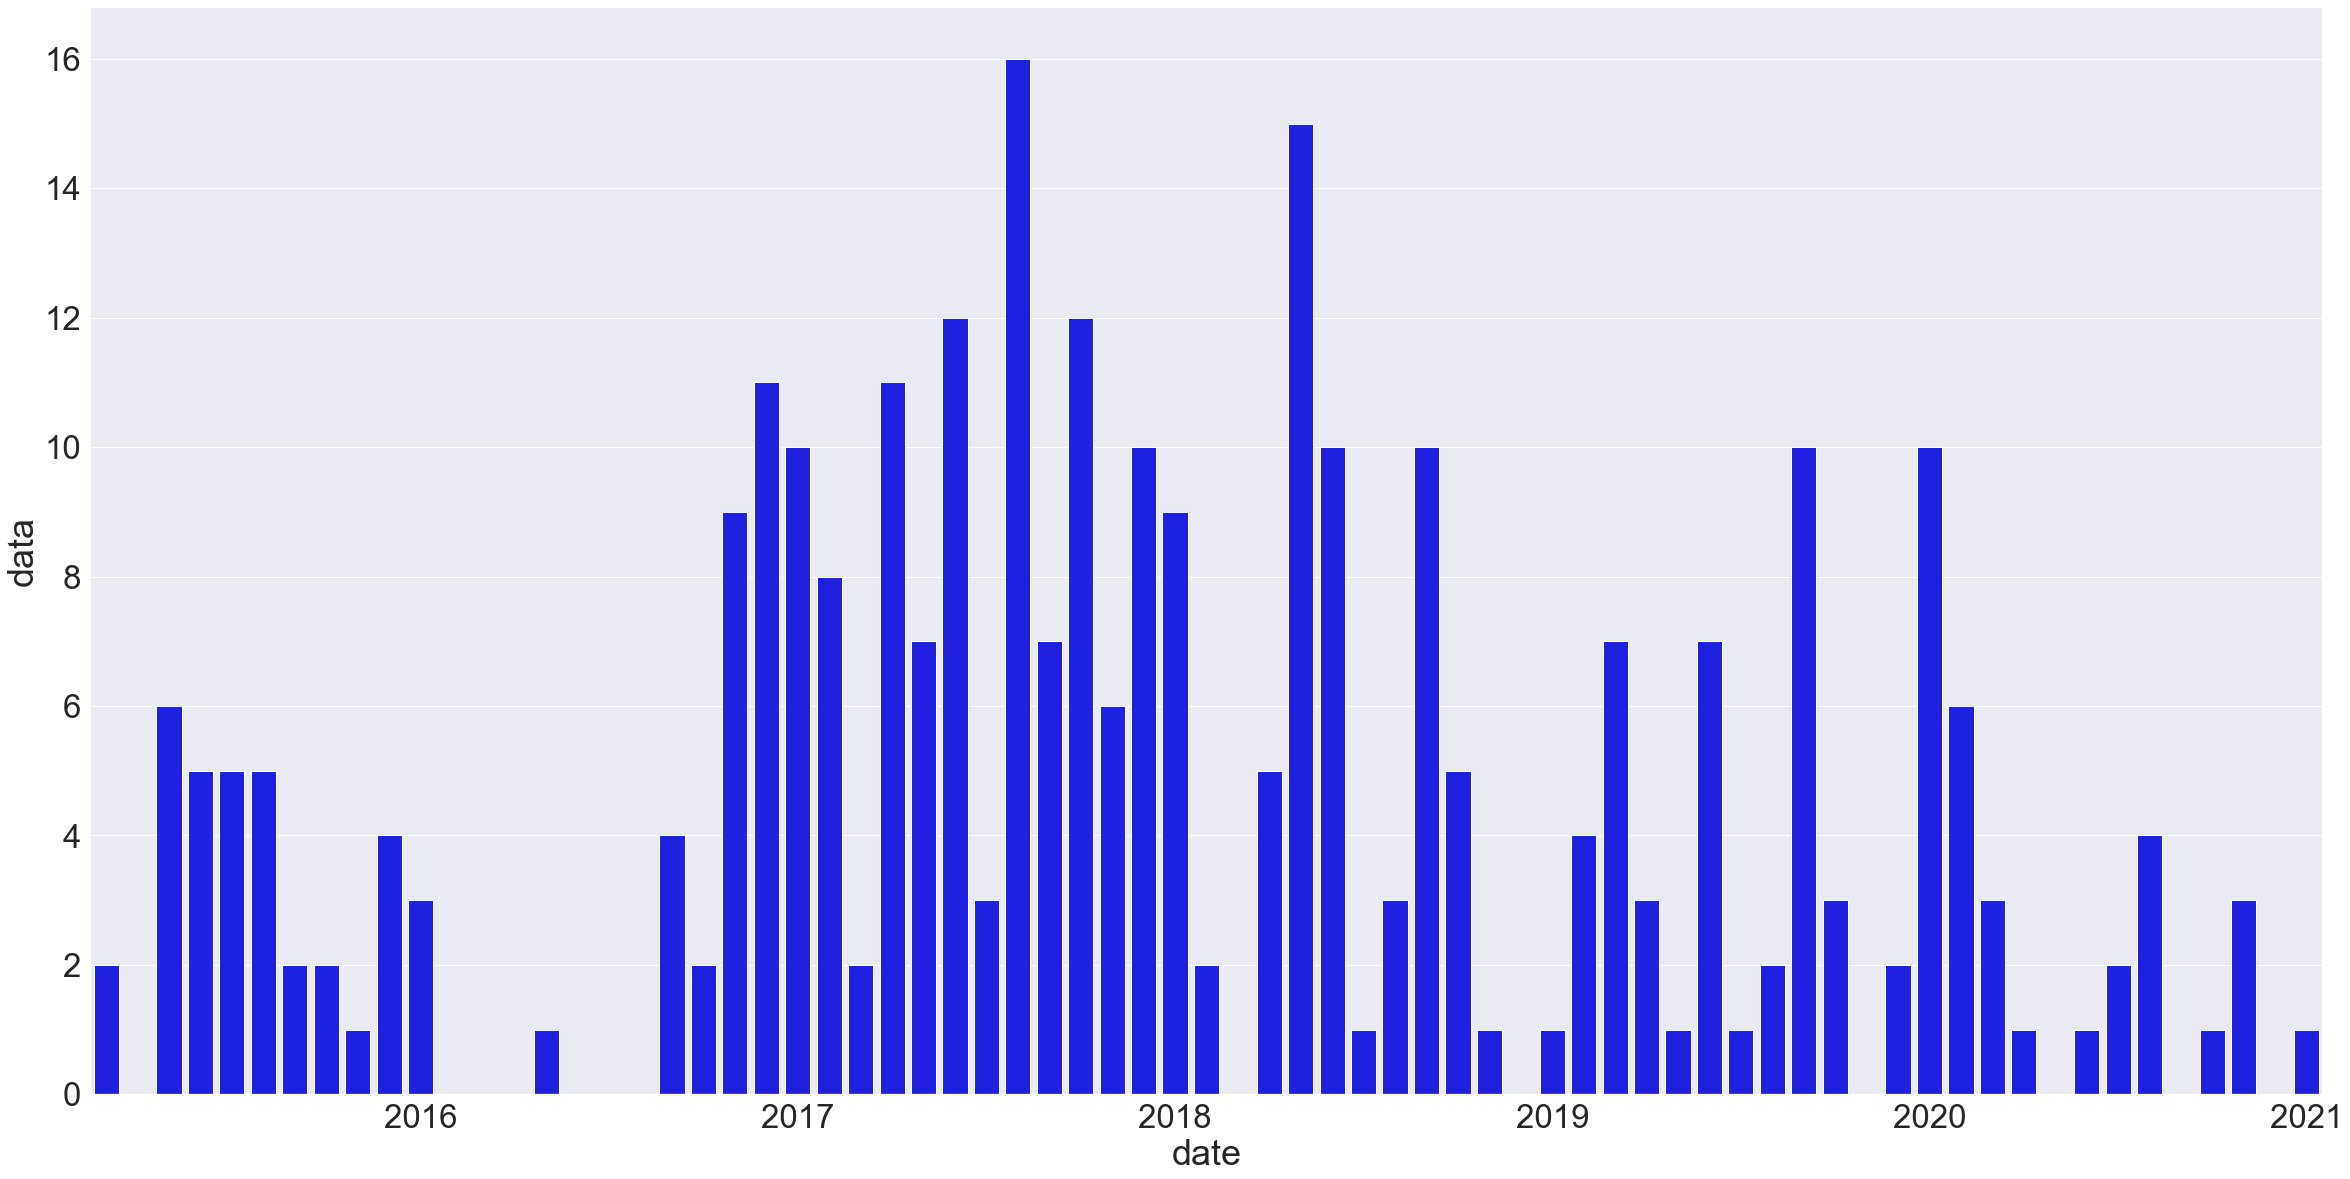

In [69]:
# Visualization

# set figure size and font size
sns.set(rc={'figure.figsize':(40,20)})
sns.set(font_scale= 3)

# set x labels
x_labels = post_counts.index

# create bar plot
sns.barplot(x_labels, post_counts, color='blue')

# only show x-axis labels for Jan 1 of every other year
tick_positions = np.arange(10, len(x_labels), step=12)

# reformate date to display year onlyplt.ylabel("post_counts")
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))

plt.show()